In [6]:
import sklearn

# Regression MLPs

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

In [8]:
rmse

0.5053326657968523

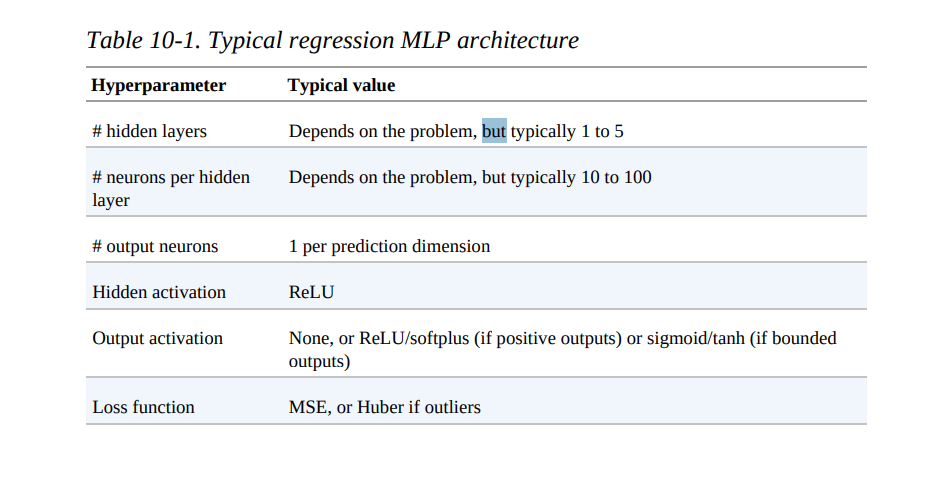

In [108]:
# "C:\Users\Dell\Desktop\Deep-learning\mlp regression.png"
from IPython.display import Image

Image(filename="images/mlp regression.png", width=950, height=300)

**Note**: Building and training a standard MLP with Scikit-Learn in just a few lines of code is very
convenient, but the neural net features are limited. This is why we will switch to Keras later.

# Classification MLPs


MLPs can also be used for classification tasks. For a binary classification
problem, you just need a single output neuron using the sigmoid activation
function: the output will be a number between 0 and 1, which you can
interpret as the estimated probability of the positive class. The estimated
probability of the negative class is equal to one minus that number.

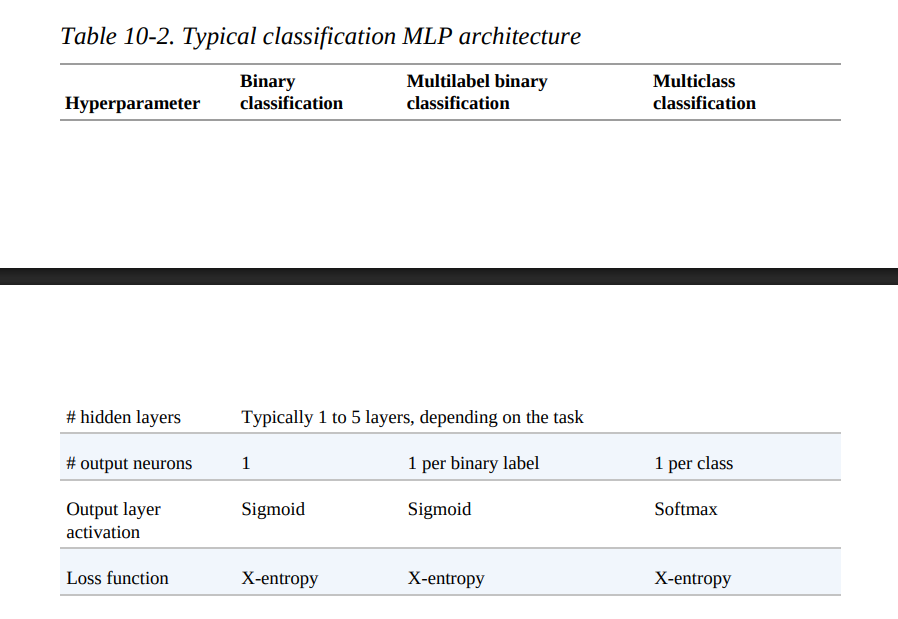

In [109]:
# "C:\Users\Dell\Desktop\Deep-learning\mlp classifier.png"
Image(filename="images/mlp classifier.png", width=950, height=300)

# Implementing MLPs with Keras


Keras is TensorFlow’s high-level deep learning API: it allows you to build,
train, evaluate, and execute all sorts of neural networks. The original Keras
library was developed by François Chollet as part of a research project
and was released as a standalone open source project in March 2015. It
quickly gained popularity, owing to its ease of use, flexibility, and beautiful
design.


Now let’s use Keras! We will start by building an MLP for image
classification.

In [11]:
import tensorflow as tf


**Building an Image Classifier Using the Sequential API**


First, we need to load a dataset. We will use Fashion MNIST, which is a
drop-in replacement of MNIST (The digits dataset). It has the exact
same format as MNIST (70,000 grayscale images of 28 × 28 pixels each,
with 10 classes), but the images represent fashion items rather than
handwritten digits, so each class is more diverse, and the problem turns out to
be significantly more challenging than MNIST. For example, a simple linear
model reaches about 92% accuracy on MNIST, but only about 83% on
Fashion MNIST.


**Using Keras to load the dataset**


Keras provides some utility functions to fetch and load common datasets,
including MNIST, Fashion MNIST, and a few more. Let’s load Fashion
MNIST. It’s already shuffled and split into a training set (60,000 images) and
a test set (10,000 images), but we’ll hold out the last 5,000 images from the
training set for validation:


In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()


In [13]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

When loading MNIST or Fashion MNIST using Keras rather than ScikitLearn, one important difference is that every image is represented as a 28 ×
28 array rather than a 1D array of size 784. Moreover, the pixel intensities are
represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0).
Let’s take a look at the shape and data type of the training set:

In [14]:
X_train.shape

(55000, 28, 28)

In [15]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [16]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

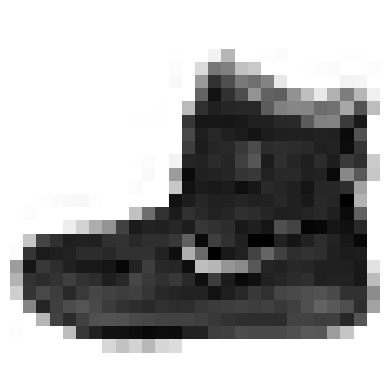

In [17]:
# plottinng the first  item in the training set
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

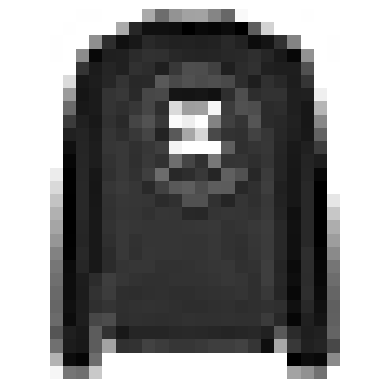

In [18]:
# plotting the last item in the train set
plt.imshow(X_train[-1], cmap="binary")
plt.axis('off')
plt.show()

In [19]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

With MNIST, when the label is equal to 5, it means that the image represents
the handwritten digit 5. Easy. For Fashion MNIST, however, we need the list
of class names to know what we are dealing with:

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
class_names[y_train[0]]

'Ankle boot'

In [22]:
y_train[0]

9

In [23]:
class_names[y_train[8]]

'Sandal'

Let's take a look at a sample of few more images in the dataset:

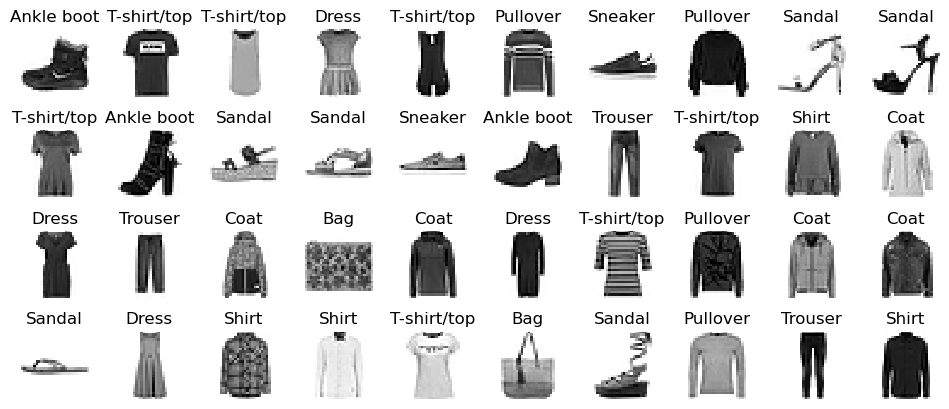

In [24]:

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Creating the model using the Sequential API

Now let’s build the neural network! Here is a classification MLP with two
hidden layers:

In [25]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Instead of adding the layers one by one as we just did, it’s often more
convenient to pass a list of layers when creating the Sequential model. You
can also drop the Input layer and instead specify the shape in the first
layer:


In [26]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The model’s summary() method displays all the model’s layers, including
each layer’s name (which is automatically generated unless you set it when
creating the layer), its output shape (None means the batch size can be
anything), and its number of parameters. The summary ends with the total
number of parameters, including trainable and non-trainable parameters. Here
we only have trainable parameters (you will see some non-trainable
parameters later in this chapter):

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


You can easily get a model’s list of layers using the layers attribute, or use
the get_layer() method to access a layer by name:


In [29]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [31]:
model.get_layer('dense') is hidden1

True

All the parameters of a layer can be accessed using its get_weights() and
set_weights() methods. For a Dense layer, this includes both the connection
weights and the bias terms:

In [32]:
weights, biases = hidden1.get_weights()
weights

array([[-0.00714539,  0.04826635, -0.01753167, ...,  0.00899558,
         0.04680003, -0.06455979],
       [-0.07291482, -0.06697077,  0.03359967, ...,  0.01166372,
        -0.01941456,  0.01764344],
       [-0.00591515,  0.02911681, -0.00067223, ...,  0.00757738,
        -0.03797651, -0.05758777],
       ...,
       [-0.03787325, -0.00508796, -0.06463486, ..., -0.02974961,
        -0.00786713,  0.0404397 ],
       [ 0.02577924,  0.05592294, -0.04973215, ...,  0.03797276,
         0.06660195,  0.02418806],
       [ 0.01239605,  0.05449049, -0.05451153, ...,  0.00935289,
         0.05887072,  0.0549698 ]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

**Note:** The shape of the weight matrix depends on the number of inputs, which is why we
specified the input_shape when creating the model. If you do not specify the input shape,
it’s OK: Keras will simply wait until it knows the input shape before it actually builds the
model parameters. This will happen either when you feed it some data (e.g., during
training), or when you call its build() method. Until the model parameters are built, you
will not be able to do certain things, such as display the model summary or save the
model. So, if you know the input shape when creating the model, it is best to specify it.

## Compiling the model

After a model is created, you must call its compile() method to specify the
loss function and the optimizer to use. Optionally, you can specify a list of
extra metrics to compute during training and evaluation:


In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


# extra code – the below code is equivalent to the previous code
# model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=[tf.keras.metrics.sparse_categorical_accuracy])

The above code requires explanation. 

We use the
"sparse_categorical_crossentropy" loss because we have sparse labels (i.e.,
for each instance, there is just a target class index, from 0 to 9 in this case),
and the classes are exclusive. If instead we had one target probability per
class for each instance (such as one-hot vectors, e.g., [0., 0., 0., 1., 0., 0., 0.,
0., 0., 0.] to represent class 3), then we would need to use the
"categorical_crossentropy" loss instead. If we were doing binary
classification or multilabel binary classification, then we would use the
"sigmoid" activation function in the output layer instead of the "softmax"
activation function, and we would use the "binary_crossentropy" loss.

Regarding the optimizer, "sgd" means that we will train the model using
stochastic gradient descent. In other words, Keras will perform the
backpropagation algorithm described earlier (i.e., reverse-mode autodiff plus
gradient descent

Finally, since this is a classifier, it’s useful to measure its accuracy during
training and evaluation, which is why we set metrics=["accuracy"].).


In [37]:
# extra code – shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Note: it's important to set `num_classes` when the number of classes is greater than the maximum class id in the sample.

In [38]:
# extra code – shows how to convert one-hot vectors to class ids
import numpy as np
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0], dtype=int64)

## Training and evaluating the model

Now the model is ready to be trained. For this we simply need to call its fit()
method:

In [39]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6932 - loss: 0.9684 - val_accuracy: 0.8244 - val_loss: 0.5112
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8241 - loss: 0.5070 - val_accuracy: 0.8388 - val_loss: 0.4562
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8428 - loss: 0.4534 - val_accuracy: 0.8446 - val_loss: 0.4300
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8530 - loss: 0.4230 - val_accuracy: 0.8518 - val_loss: 0.4135
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8595 - loss: 0.4013 - val_accuracy: 0.8556 - val_loss: 0.4025
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8657 - loss: 0.3844 - val_accuracy: 0.8582 - val_loss: 0.3924
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8697 - loss: 0.3701 - val_accuracy: 0.8640 - val_loss: 0.3844
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8737 - loss: 0.3579 -

And that’s it! The neural network is trained. At each epoch during training,
Keras displays the number of mini-batches processed so far on the left side of
the progress bar. The batch size is 32 by default, and since the training set has
55,000 images, the model goes through 1,719 batches per epoch: 1,718 of
size 32, and 1 of size 24. After the progress bar, you can see the mean
training time per sample, and the loss and accuracy (or any other extra
metrics you asked for) on both the training set and the validation set. Notice
that the training loss went down, which is a good sign, and the validation
accuracy reached 88.94% after 30 epochs. That’s slightly below the training
accuracy, so there is a little bit of overfitting going on, but not a huge
amount.

We pass it the input features (X_train) and the target classes (y_train), as well
as the number of epochs to train (or else it would default to just 1, which
would definitely not be enough to converge to a good solution). We also pass
a validation set (this is optional). Keras will measure the loss and the extra
metrics on this set at the end of each epoch, which is very useful to see how
well the model really performs. If the performance on the training set is much
better than on the validation set, your model is probably overfitting the
training set, or there is a bug, such as a data mismatch between the training
set and the validation set.


**Tip:** Shape errors are quite common, especially when getting started, so you should familiarize
yourself with the error messages: try fitting a model with inputs and/or labels of the wrong
shape, and see the errors you get. Similarly, try compiling the model with
loss="categorical_crossentropy" instead of loss="sparse_cat egorical_crossentropy". Or
you can remove the Flatten layer.


**Tip:** Instead of passing a validation set using the validation_data argument, you could set
validation_split to the ratio of the training set that you want Keras to use for validation.
For example, validation_split=0.1 tells Keras to use the last 10% of the data (before
shuffling) for validation.

If the training set was very skewed, with some classes being overrepresented
and others underrepresented, it would be useful to set the class_weight
argument when calling the fit() method, to give a larger weight to
underrepresented classes and a lower weight to overrepresented classes.
These weights would be used by Keras when computing the loss. If you need
per-instance weights, set the sample_weight argument. If both class_weight
and sample_weight are provided, then Keras multiplies them. Per-instance
weights could be useful, for example, if some instances were labeled by
experts while others were labeled using a crowdsourcing platform: you might
want to give more weight to the former. You can also provide sample weights
(but not class weights) for the validation set by adding them as a third item in
the validation_data tuple.

The fit() method returns a History object containing the training parameters
(history.params), the list of epochs it went through (history.epoch), and most
importantly a dictionary (history.history) containing the loss and extra
metrics it measured at the end of each epoch on the training set and on the
validation set (if any). If you use this dictionary to create a Pandas DataFrame
and call its plot() method, you get the learning curves shown in the Figure below:

In [40]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

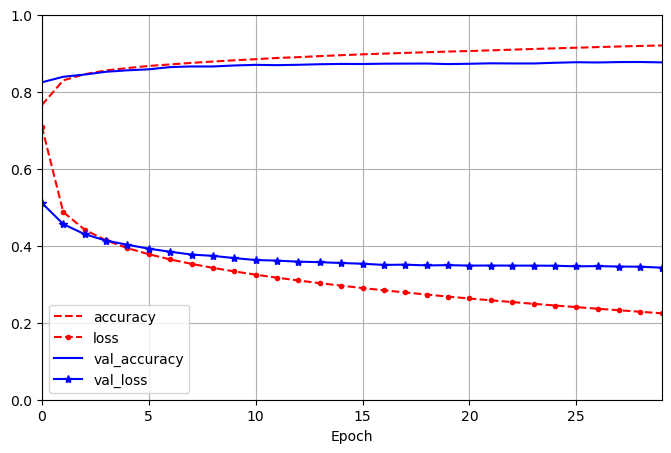

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  #
plt.show()


You can see that both the training accuracy and the validation accuracy
steadily increase during training, while the training loss and the validation
loss decrease. This is good. The validation curves are relatively close to each
other at first, but they get further apart over time, which shows that there’s a
little bit of overfitting. In this particular case, the model looks like it
performed better on the validation set than on the training set at the beginning
of training, but that’s not actually the case. The validation error is computed
at the end of each epoch, while the training error is computed using a running
mean during each epoch, so the training curve should be shifted by half an
epoch to the left. If you do that, you will see that the training and validation
curves overlap almost perfectly at the beginning of training.

    
The training set performance ends up beating the validation performance, as
is generally the case when you train for long enough. You can tell that the
model has not quite converged yet, as the validation loss is still going down,
so you should probably continue training. This is as simple as calling the fit()
method again, since Keras just continues training where it left off: you should
be able to reach about 89.8% validation accuracy, while the training accuracy
will continue to rise up to 100% (this is not always the case).

                                  
If you are not satisfied with the performance of your model, you should go
back and tune the hyperparameters. The first one to check is the learning rate.
If that doesn’t help, try another optimizer (and always retune the learning rate
after changing any hyperparameter). 

If the performance is still not great, then
try tuning model hyperparameters such as the number of layers, the number
of neurons per layer, and the types of activation functions to use for each
hidden layer. You can also try tuning other hyperparameters, such as the
batch size (it can be set in the fit() method using the batch_size argument,
which defaults to 32). We will get back to hyperparameter tuning at the end
of this chapter. 

Once you are satisfied with your model’s validation accuracy,
you should evaluate it on the test set to estimate the generalization error
before you deploy the model to production. You can easily do this using the
evaluate() method (it also supports several other arguments, such as
batch_size and sample_weight.

In [42]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8755 - loss: 0.3611


[0.36120662093162537, 0.8741999864578247]

It is common to get slightly lower performance on
the test set than on the validation set, because the hyperparameters are tuned
on the validation set, not the test set (however, in this example, we did not do
any hyperparameter tuning, so the lower accuracy is just bad luck).
Remember to resist the temptation to tweak the hyperparameters on the test
set, or else your estimate of the generalization error will be too optimistic.


## Using the model to make predictions

Now let’s use the model’s predict() method to make predictions on new
instances. Since we don’t have actual new instances, we’ll just use the last
three instances of the test set:


In [43]:
X_new = X_test[-3:]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [44]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([8, 1, 5], dtype=int64)

In [45]:
np.array(class_names)[y_pred]

array(['Bag', 'Trouser', 'Sandal'], dtype='<U11')

In [46]:
y_new = y_test[-3:]
y_new

array([8, 1, 5], dtype=uint8)

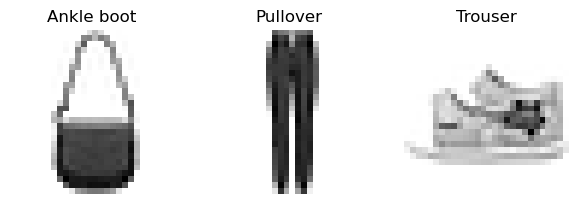

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Here, the classifier actually classified all three images correctly.

Now you know how to use the sequential API to build, train, and evaluate a
classification MLP. But what about regression?

# Building a Regression MLP Using the Sequential API

Let’s switch back to the California housing problem and tackle it using the
same MLP as earlier, with 3 hidden layers composed of 50 neurons each, but
this time building it with Keras.

Using the sequential API to build, train, evaluate, and use a regression MLP
is quite similar to what we did for classification. The main differences in the
following code example are the fact that the output layer has a single neuron
(since we only want to predict a single value) and it uses no activation
function, the loss function is the mean squared error, the metric is the RMSE,
and we’re using an Adam optimizer like Scikit-Learn’s MLPRegressor did.
Moreover, in this example we don’t need a Flatten layer, and instead we’re
using a Normalization layer as the first layer: it does the same thing as ScikitLearn’s StandardScaler, but it must be fitted to the training data using its
adapt() method before you call the model’s fit() method. (Keras has other
preprocessing layers which we will see othertimes). Let’s take a look:

Let's load, split and scale the California housing dataset:

In [48]:
# load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [49]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.4032 - loss: 2.1553 - val_RootMeanSquaredError: 1.0383 - val_loss: 1.0781
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6367 - loss: 0.4060 - val_RootMeanSquaredError: 1.0932 - val_loss: 1.1951
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6080 - loss: 0.3698 - val_RootMeanSquaredError: 1.0173 - val_loss: 1.0349
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5993 - loss: 0.3594 - val_RootMeanSquaredError: 1.0269 - val_loss: 1.0546
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5885 - loss: 0.3464 - val_RootMeanSquaredError: 0.7771 - val_loss: 0.6039
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5804 - loss: 0.3370 - val_RootMeanSquaredError: 0.6354 - val_loss: 0.4037
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5737 - los

In [51]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


# Building Complex Models Using the Functional API

One example of a nonsequential neural network is a Wide & Deep neural
network. This neural network architecture was introduced in a 2016 paper by
Heng-Tze Cheng et al. It connects all or part of the inputs directly to the
output layer. This architecture makes it possible
for the neural network to learn both deep patterns (using the deep path) and
simple rules (through the short path). In contrast, a regular MLP forces all
the data to flow through the full stack of layers; thus, simple patterns in the
data may end up being distorted by this sequence of transformations.

Let’s build such a neural network to tackle the California housing problem:


In [52]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [53]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

At a high level, the first five lines create all the layers we need to build the
model, the next six lines use these layers just like functions to go from the
input to the output, and the last line creates a Keras Model object by pointing
to the input and the output.

In [54]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 8)                 │              17 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 30)                │             270 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 30)                │             930 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 38)                │               0 │ normalization[0][0],       │
│                               │                           │                 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │              39 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [55]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.4602 - loss: 2.2383 - val_RootMeanSquaredError: 2.8870 - val_loss: 8.3349
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7351 - loss: 0.5420 - val_RootMeanSquaredError: 1.8325 - val_loss: 3.3582
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6481 - loss: 0.4205 - val_RootMeanSquaredError: 1.1587 - val_loss: 1.3427
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6233 - loss: 0.3889 - val_RootMeanSquaredError: 0.7784 - val_loss: 0.6059
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6102 - loss: 0.3727 - val_RootMeanSquaredError: 0.6277 - val_loss: 0.3940
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6026 - loss: 0.3635 - val_RootMeanSquaredError: 0.5874 - val_loss: 0.3451
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5962 - los

But what if you want to send a subset of the features through the wide path
and a different subset (possibly overlapping) through the deep path? In this case, one solution is to use multiple inputs.
For example, suppose we want to send five features through the wide path
(features 0 to 4), and six features through the deep path (features 2 to 7). We
can do this as follows:


In [56]:
tf.random.set_seed(42)  # extra code

In [57]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

Now we can compile the model as usual, but when we call the fit() method,
instead of passing a single input matrix X_train, we must pass a pair of
matrices (X_train_wide, X_train_deep), one per input. The same is true for
X_valid, and also for X_test and X_new when you call evaluate() or
predict():

In [58]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.8890 - loss: 3.6969 - val_RootMeanSquaredError: 1.1094 - val_loss: 1.2308
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8860 - loss: 0.7871 - val_RootMeanSquaredError: 0.7418 - val_loss: 0.5503
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7524 - loss: 0.5666 - val_RootMeanSquaredError: 0.7357 - val_loss: 0.5413
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6958 - loss: 0.4844 - val_RootMeanSquaredError: 0.8271 - val_loss: 0.6841
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6593 - loss: 0.4348 - val_RootMeanSquaredError: 1.1347 - val_loss: 1.2875
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6389 - loss: 0.4083 - val_RootMeanSquaredError: 1.6588 - val_loss: 2.7518
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6259 - los

In [59]:
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.5831 - loss: 0.3402


In [60]:
y_pred = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [61]:
y_pred

array([[0.22533435],
       [1.3319093 ],
       [3.572631  ]], dtype=float32)

**Tip:** Instead of passing a tuple (X_train_wide, X_train_deep), you can pass a dictionary
{"input_wide": X_train_wide, "input_deep": X_train_deep}, if you set
name="input_wide" and name="input_deep" when creating the inputs. This is highly
recommended when there are many inputs, to clarify the code and avoid getting the order
wrong.


There are also many use cases in which you may want to have multiple
outputs:
- The task may demand it. For instance, you may want to locate and
classify the main object in a picture. This is both a regression tasks and a
classification task.
- Similarly, you may have multiple independent tasks based on the same
data. Sure, you could train one neural network per task, but in many
cases you will get better results on all tasks by training a single neural
network with one output per task. This is because the neural network can
learn features in the data that are useful across tasks. For example, you
could perform multitask classification on pictures of faces, using one
output to classify the person’s facial expression (smiling, surprised, etc.)
and another output to identify whether they are wearing glasses or not.
- Another use case is as a regularization technique (i.e., a training
constraint whose objective is to reduce overfitting and thus improve the
model’s ability to generalize). For example, you may want to add an
auxiliary output in a neural network architecture to
ensure that the underlying part of the network learns something useful
on its own, without relying on the rest of the network.

Adding an auxiliary output for regularization:

Adding an extra output is quite easy: we just connect it to the appropriate
layer and add it to the model’s list of outputs.

In [62]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [63]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()

norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

**Warning**: in recent versions, Keras requires one metric per output, so I replaced `metrics=["RootMeanSquaredError"]` with `metrics=["RootMeanSquaredError", "RootMeanSquaredError"]` in the code below.

In [64]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [65]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - dense_2_RootMeanSquaredError: 1.3267 - dense_2_loss: 1.6649 - dense_3_RootMeanSquaredError: 1.6547 - dense_3_loss: 0.2801 - loss: 1.9450 - val_dense_2_RootMeanSquaredError: 1.6401 - val_dense_2_loss: 2.4198 - val_dense_3_RootMeanSquaredError: 3.2937 - val_dense_3_loss: 1.0843 - val_loss: 3.5058
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_RootMeanSquaredError: 0.7240 - dense_2_loss: 0.4722 - dense_3_RootMeanSquaredError: 0.9426 - dense_3_loss: 0.0889 - loss: 0.5611 - val_dense_2_RootMeanSquaredError: 0.8843 - val_dense_2_loss: 0.7036 - val_dense_3_RootMeanSquaredError: 2.3264 - val_dense_3_loss: 0.5410 - val_loss: 1.2451
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_RootMeanSquaredError: 0.6793 - dense_2_loss: 0.4156 - dense_3_RootMeanSquaredError: 0.8110 - dense_3_loss: 0.0658 - loss: 0.4814 - val_dense_2_RootMeanSquaredError: 0.6703 - val_dense_2_loss: 0.4042 - val_dense_3_RootMeanSquaredError: 1.6

When we evaluate the model, Keras returns the weighted sum of the losses,
as well as all the individual losses and metrics:


In [66]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_2_RootMeanSquaredError: 0.5807 - dense_2_loss: 0.3035 - dense_3_RootMeanSquaredError: 0.6369 - dense_3_loss: 0.0406 - loss: 0.3441


Similarly, the predict() method will return predictions for each output:


**TIP:**
If you set return_dict=True, then evaluate() will return a dictionary instead of a big tuple.


In [68]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [69]:
y_pred_main

array([[0.35459882],
       [1.3213619 ],
       [3.577332  ]], dtype=float32)

In [70]:
y_pred_aux

array([[0.4143194],
       [1.1122843],
       [3.3224375]], dtype=float32)

The predict() method returns a tuple, and it does not have a return_dict
argument to get a dictionary instead. However, you can create one using
model.output_names:

In [71]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [72]:
y_pred_tuple

[array([[0.35459882],
        [1.3213619 ],
        [3.577332  ]], dtype=float32),
 array([[0.4143194],
        [1.1122843],
        [3.3224375]], dtype=float32)]

In [73]:
y_pred

{'dense_2': array([[0.35459882],
        [1.3213619 ],
        [3.577332  ]], dtype=float32),
 'dense_3': array([[0.4143194],
        [1.1122843],
        [3.3224375]], dtype=float32)}

As you can see, you can build all sorts of architectures with the functional
API. Next, we’ll look at one last way you can build Keras models.

# Using the Subclassing API to Build Dynamic Models

Both the sequential API and the functional API are declarative: you start by
declaring which layers you want to use and how they should be connected,
and only then can you start feeding the model some data for training or
inference. This has many advantages: the model can easily be saved, cloned,
and shared; its structure can be displayed and analyzed; the framework can
infer shapes and check types, so errors can be caught early (i.e., before any
data ever goes through the model). It’s also fairly straightforward to debug,
since the whole model is a static graph of layers. But the flip side is just that:
it’s static. Some models involve loops, varying shapes, conditional branching,
and other dynamic behaviors. For such cases, or simply if you prefer a more
imperative programming style, the subclassing API is for you.

With this approach, you subclass the Model class, create the layers you need
in the constructor, and use them to perform the computations you want in the
call() method. For example, creating an instance of the following
WideAndDeepModel class gives us an equivalent model to the one we just
built with the functional API:


In [74]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [75]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=10, validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))



Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 1.3634 - RootMeanSquaredError_1: 1.9513 - loss: 2.1500 - mse_loss: 0.3870 - val_RootMeanSquaredError: 0.7383 - val_RootMeanSquaredError_1: 2.8500 - val_loss: 1.3028 - val_mse_loss: 0.8119
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7291 - RootMeanSquaredError_1: 1.0414 - loss: 0.5879 - mse_loss: 0.1086 - val_RootMeanSquaredError: 0.6406 - val_RootMeanSquaredError_1: 1.5722 - val_loss: 0.6165 - val_mse_loss: 0.2471
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6753 - RootMeanSquaredError_1: 0.8294 - loss: 0.4796 - mse_loss: 0.0688 - val_RootMeanSquaredError: 0.9291 - val_RootMeanSquaredError_1: 0.7877 - val_loss: 0.8389 - val_mse_loss: 0.0620
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6577 - RootMeanSquaredError_1: 0.7788 - loss: 0.4503 - mse_loss: 0.0607 - val_RootMeanSquaredError: 1.0927 - val_RootMeanSquaredEr

In [76]:

eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep)) 

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.6077 - RootMeanSquaredError_1: 0.7040 - loss: 0.3820 - mse_loss: 0.0496
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


🧠 Key Takeaways

- Use the Sequential API when your model is just a straight stack of layers.

- Use the Functional API when you need more complex data flows (like multiple inputs/outputs).

- Use the Subclassing API when you need dynamic behavior or complete control over how your model works.

Now that I know how to build and train neural nets using Keras, I will
want to save them!


# Saving and Restoring a Model

Saving a trained Keras model is as simple as it gets:


In [77]:
model.save("my_model.keras")


To load a `.keras` model, use the `tf.keras.models.load_model()` function. If the model uses any custom object, you must pass them to the function via the `custom_objects` argument:

In [78]:
loaded_model = tf.keras.models.load_model(
    "my_model.keras",
    custom_objects={"WideAndDeepModel": WideAndDeepModel}
)

You can also use save_weights() and load_weights() to save and load only
the parameter values. This includes the connection weights, biases,
preprocessing stats, optimizer state, etc. The parameter values are saved in
one or more files such as my_weights.data-00004-of-00052, plus an index file
like my_weights.index.
    
Saving just the weights is faster and uses less disk space than saving the
whole model, so it’s perfect to save quick checkpoints during training. If
you’re training a big model, and it takes hours or days, then you must save
checkpoints regularly in case the computer crashes. But how can you tell the
fit() method to save checkpoints? Use callbacks.

# Using Callbacks

Callbacks are special hooks in Keras that let you intervene at key points during training, evaluation, or prediction. You can use them to do things like:

- Save checkpoints during training.

- Reduce the learning rate when a metric stops improving.

- Stop training early if validation loss stalls.

- Log data to TensorBoard.

- Track or debug model behavior batch-by-batch or epoch-by-epoch.





Keras **callbacks** let you hook into different stages of training, evaluation, and prediction:

* **Before/after training**
* **Before/after each epoch**
* **Before/after each batch**

You pass a list of callback objects to the `fit()` method using the `callbacks` argument.

---

### ✅ **ModelCheckpoint**

* **Purpose**: Saves model weights during training (e.g., at the end of each epoch).
* **Usage**:

  ```python
  checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)
  model.fit(..., callbacks=[checkpoint_cb])
  ```
* **Advanced Option**:
  `save_best_only=True` ensures only the best model on the validation set is saved, helping prevent overfitting.

---

### ⏹️ **EarlyStopping**

* **Purpose**: Stops training when validation performance stops improving.
* **Key Arguments**:

  * `patience`: Number of epochs to wait without improvement.
  * `restore_best_weights=True`: Automatically reverts to the best model weights.
* **Use Together**: Combine `ModelCheckpoint` and `EarlyStopping` for safer and smarter training:

  ```python
  early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
  model.fit(..., callbacks=[checkpoint_cb, early_stopping_cb])
  ```
* **Tip**: You can train for many epochs safely—training stops early if needed.

---

### 🧑‍💻 **Custom Callbacks**

* You can define your own callback by subclassing `tf.keras.callbacks.Callback`.
* Example: Print the ratio of validation to training loss after each epoch:

  ```python
  class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs):
          ratio = logs["val_loss"] / logs["loss"]
          print(f"Epoch={epoch}, val/train={ratio:.2f}")
  ```

---

### 🔍 **Other Uses**

Callbacks also support:

* **Evaluation** (`on_test_begin`, `on_test_end`, etc.)
* **Prediction** (`on_predict_begin`, `on_predict_end`, etc.)
  Useful for logging, debugging, or collecting detailed metrics during testing or inference.

---

### 📌 Takeaway

Keras callbacks are essential tools to:

* Save and restore model checkpoints
* Avoid overfitting with early stopping
* Debug and monitor training/evaluation
* Customize training logic flexibly


In [79]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6102 - RootMeanSquaredError_1: 0.7126 - loss: 0.3860 - mse_loss: 0.0508 - val_RootMeanSquaredError: 1.0586 - val_RootMeanSquaredError_1: 0.9358 - val_loss: 1.0962 - val_mse_loss: 0.0875
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6070 - RootMeanSquaredError_1: 0.7021 - loss: 0.3811 - mse_loss: 0.0493 - val_RootMeanSquaredError: 1.3906 - val_RootMeanSquaredError_1: 2.0616 - val_loss: 2.1654 - val_mse_loss: 0.4248
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6039 - RootMeanSquaredError_1: 0.6952 - loss: 0.3766 - mse_loss: 0.0483 - val_RootMeanSquaredError: 1.7224 - val_RootMeanSquaredError_1: 2.0732 - val_loss: 3.0999 - val_mse_loss: 0.4296
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6048 - RootMeanSquaredError_1: 0.6914 - loss: 0.3772 - mse_loss: 0.0478 - val_RootMeanSquaredError: 1.6623 - val_RootMeanSquaredEr

In [80]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5810 - RootMeanSquaredError_1: 0.6394 - loss: 0.3448 - mse_loss: 0.0409 - val_RootMeanSquaredError: 1.0845 - val_RootMeanSquaredError_1: 1.1987 - val_loss: 1.2022 - val_mse_loss: 0.1436
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5786 - RootMeanSquaredError_1: 0.6345 - loss: 0.3416 - mse_loss: 0.0403 - val_RootMeanSquaredError: 0.9706 - val_RootMeanSquaredError_1: 1.4706 - val_loss: 1.0642 - val_mse_loss: 0.2162
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5743 - RootMeanSquaredError_1: 0.6303 - loss: 0.3366 - mse_loss: 0.0398 - val_RootMeanSquaredError: 0.8104 - val_RootMeanSquaredError_1: 1.0722 - val_loss: 0.7060 - val_mse_loss: 0.1149
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5726 - RootMeanSquaredError_1: 0.6267 - loss: 0.3344 - mse_loss: 0.0393 - val_RootMeanSquaredError: 1.0099 - val_RootMeanSquar

In [81]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [82]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.97
Epoch=1, val/train=1.72
Epoch=2, val/train=2.34
Epoch=3, val/train=1.48
Epoch=4, val/train=2.36
Epoch=5, val/train=1.68
Epoch=6, val/train=2.28
Epoch=7, val/train=1.46
Epoch=8, val/train=2.20
Epoch=9, val/train=1.43


# Using TensorBoard for Visualization


### Using TensorBoard for Visualization

TensorBoard is a great interactive visualization tool that you can use to view
the learning curves during training, compare curves and metrics between
multiple runs, visualize the computation graph, analyze training statistics,
view images generated by your model, visualize complex multidimensional
data projected down to 3D and automatically clustered for you, profile your
network (i.e., measure its speed to identify bottlenecks), and more!


To use TensorBoard, you must modify your program so that it outputs the
data you want to visualize to special binary logfiles called event files. Each
binary data record is called a summary. The TensorBoard server will monitor
the log directory, and it will automatically pick up the changes and update the
visualizations: this allows you to visualize live data (with a short delay), such
as the learning curves during training. In general, you want to point the
TensorBoard server to a root log directory and configure your program so
that it writes to a different subdirectory every time it runs. This way, the same
TensorBoard server instance will allow you to visualize and compare data
from multiple runs of your program, without getting everything mixed up.

Let’s name the root log directory my_logs, and let’s define a little function
that generates the path of the log subdirectory based on the current date and
time, so that it’s different at every run:

In [83]:
# deletes any logs  folder before creating new one

import shutil
from pathlib import Path

shutil.rmtree("my_logs", ignore_errors=True)  # Completely deletes the entire log directory


In [84]:
from pathlib import Path
from time import strftime
import tensorflow as tf

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")


In [85]:
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [86]:
# tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
#                                                 profile_batch=(100, 200))
# history = model.fit(X_train, y_train, epochs=20,
#                     validation_data=(X_valid, y_valid),
#                     callbacks=[tensorboard_cb])

run_logdir_1 = get_run_logdir()
tensorboard_cb_1 = tf.keras.callbacks.TensorBoard(run_logdir_1, profile_batch=(100, 200))
history_1 = model.fit(X_train, y_train, epochs=20,
                      validation_data=(X_valid, y_valid),
                      callbacks=[tensorboard_cb_1])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - RootMeanSquaredError: 1.8102 - loss: 3.3282 - val_RootMeanSquaredError: 1.0741 - val_loss: 1.1537
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 0.9285 - loss: 0.8639 - val_RootMeanSquaredError: 0.8130 - val_loss: 0.6610
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.8352 - loss: 0.6984 - val_RootMeanSquaredError: 0.7700 - val_loss: 0.5929
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.8030 - loss: 0.6456 - val_RootMeanSquaredError: 0.7426 - val_loss: 0.5514
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.7768 - loss: 0.6041 - val_RootMeanSquaredError: 0.7192 - val_loss: 0.5172
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.7536 - loss: 0.5686 - val_RootMeanSquaredError: 0.6988 - val_loss: 0.4884
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.7333 - los

Now, let's try changing the learning rate from 0.001 to 0.002, and run the code
again, with a new log subdirectory.

In [87]:
optimizer = tf.keras.optimizers.SGD(learning_rate=2e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

run_logdir_2 = get_run_logdir()
tensorboard_cb_2 = tf.keras.callbacks.TensorBoard(run_logdir_2, profile_batch=(100, 200))
history_2 = model.fit(X_train, y_train, epochs=20,
                      validation_data=(X_valid, y_valid),
                      callbacks=[tensorboard_cb_2])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6362 - loss: 0.4050 - val_RootMeanSquaredError: 0.6032 - val_loss: 0.3638
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6330 - loss: 0.4009 - val_RootMeanSquaredError: 0.6064 - val_loss: 0.3677
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6302 - loss: 0.3974 - val_RootMeanSquaredError: 0.6009 - val_loss: 0.3611
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6276 - loss: 0.3942 - val_RootMeanSquaredError: 0.6011 - val_loss: 0.3613
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6254 - loss: 0.3914 - val_RootMeanSquaredError: 0.5982 - val_loss: 0.3579
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6233 - loss: 0.3888 - val_RootMeanSquaredError: 0.5974 - val_loss: 0.3569
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6216 - los

In [88]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2025_06_09_14_38_16
    plugins
      profile
        2025_06_09_13_38_19
          AUWALS-PC.xplane.pb
    train
      events.out.tfevents.1749476296.AUWALS-PC.8824.0.v2
    validation
      events.out.tfevents.1749476300.AUWALS-PC.8824.1.v2
  run_2025_06_09_14_38_49
    plugins
      profile
        2025_06_09_13_38_50
          AUWALS-PC.xplane.pb
    train
      events.out.tfevents.1749476329.AUWALS-PC.8824.2.v2
    validation
      events.out.tfevents.1749476331.AUWALS-PC.8824.3.v2


In [110]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12732), started 6 days, 0:18:04 ago. (Use '!kill 12732' to kill it.)

**Note**: if you prefer to access TensorBoard in a separate tab, click the "localhost:6006" link below:

In [91]:
# use the below commented code if you are using colab

"""
if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/" target="_blank">Click here to open TensorBoard</a>'))
"""

# I will use the below since I  am using jupyter

from IPython.display import display, HTML

# Display clickable link to open TensorBoard in the browser
display(HTML('<a href="http://localhost:6006/" target="_blank">Click here to open TensorBoard</a>'))


Additionally, TensorFlow offers a lower-level API in the tf.summary
package. The following code creates a SummaryWriter using the
create_file_writer() function, and it uses this writer as a Python context to log
scalars, histograms, images, audio, and text, all of which can then be
visualized using TensorBoard:


In [92]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

If you run this code and click the refresh button in TensorBoard, you will see
several tabs appear: IMAGES, AUDIO, DISTRIBUTIONS, HISTOGRAMS,
and TEXT. Try clicking the IMAGES tab, and use the slider above each
image to view the images at different time steps. Similarly, go to the AUDIO
tab and try listening to the audio at different time steps. As you can see,
TensorBoard is a useful tool even beyond TensorFlow or deep learning.


Let’s summarize what you’ve learned so far in this chapter: you now know
where neural nets came from, what an MLP is and how you can use it for
classification and regression, how to use Keras’s sequential API to build
MLPs, and how to use the functional API or the subclassing API to build
more complex model architectures (including Wide & Deep models, as well
as models with multiple inputs and outputs). You also learned how to save
and restore a model and how to use callbacks for checkpointing, early
stopping, and more. Finally, you learned how to use TensorBoard for
visualization. You can already go ahead and use neural networks to tackle
many problems! However, you may wonder how to choose the number of
hidden layers, the number of neurons in the network, and all the other
hyperparameters. Let’s look at this now.

# Fine-Tuning Neural Network Hyperparameters

The flexibility of neural networks is also one of their main drawbacks: there
are many hyperparameters to tweak. Not only can you use any imaginable
network architecture, but even in a basic MLP you can change the number of
layers, the number of neurons and the type of activation function to use in
each layer, the weight initialization logic, the type of optimizer to use, its
learning rate, the batch size, and more. How do you know what combination
of hyperparameters is the best for your task

One option is to convert your Keras model to a Scikit-Learn estimator, and
then use GridSearchCV or RandomizedSearchCV to fine-tune the
hyperparameters. For this, you can use the
KerasRegressor and KerasClassifier wrapper classes from the SciKeras
library (see https://github.com/adriangb/scikeras for more details). However,
there’s a better way: you can use the Keras Tuner library, which is a
hyperparameter tuning library for Keras models. It offers several tuning
strategies, it’s highly customizable, and it has excellent integration with
TensorBoard. Let’s see how to use it

Now,
import keras_tuner, usually as kt, then write a function that builds, compiles,
and returns a Keras model. The function must take a kt.HyperParameters
object as an argument, which it can use to define hyperparameters (integers,
floats, strings, etc.) along with their range of possible values, and these
hyperparameters may be used to build and compile the model. For example,
the following function builds and compiles an MLP to classify Fashion
MNIST images, using hyperparameters such as the number of hidden layers
(n_hidden), the number of neurons per layer (n_neurons), the learning rate
(learning_rate), and the type of optimizer to use (optimizer):

In [93]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [94]:
%pip install -q -U keras_tuner
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

Note: you may need to restart the kernel to use updated packages.


The first part of the function defines the hyperparameters. For example,
hp.Int("n_hidden", min_value=0, max_value=8, default=2) checks whether a
hyperparameter named "n_hidden" is already present in the HyperParameters
object hp, and if so it returns its value. If not, then it registers a new integer
hyperparameter named "n_hidden", whose possible values range from 0 to 8
(inclusive), and it returns the default value, which is 2 in this case (when
default is not set, then min_value is returned). The "n_neurons"
hyperparameter is registered in a similar way. The "learning_rate"
hyperparameter is registered as a float ranging from 10 to 10 , and since
sampling="log", learning rates of all scales will be sampled equally. Lastly,
the optimizer hyperparameter is registered with two possible values: "sgd" or
"adam" (the default value is the first one, which is "sgd" in this case).
Depending on the value of optimizer, we create an SGD optimizer or an
Adam optimizer with the given learning rate.

The second part of the function just builds the model using the
hyperparameter values. It creates a Sequential model starting with a Flatten
layer, followed by the requested number of hidden layers (as determined by
the n_hidden hyperparameter) using the ReLU activation function, and an
output layer with 10 neurons (one per class) using the softmax activation
function. Lastly, the function compiles the model and returns it.

In this section we'll use the Fashion MNIST dataset again:

In [95]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

Now if you want to do a basic random search, you can create a
kt.RandomSearch tuner, passing the build_model function to the constructor,
and call the tuner’s search() method:

In [96]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 43s]
val_accuracy: 0.8375999927520752

Best val_accuracy So Far: 0.8575999736785889
Total elapsed time: 00h 03m 36s


The RandomSearch tuner first calls build_model() once with an empty
Hyperparameters object, just to gather all the hyperparameter specifications.
Then, in this example, it runs 5 trials; for each trial it builds a model using
hyperparameters sampled randomly within their respective ranges, then it
trains that model for 10 epochs and saves it to a subdirectory of the
my_fashion_mnist/my_rnd_search directory. Since overwrite=True, the
my_rnd_search directory is deleted before training starts. If you run this code
a second time but with overwrite=False and max_trials=10, the tuner will
continue tuning where it left off, running 5 more trials: this means you don’t
have to run all the trials in one shot. Lastly, since objective is set to
"val_accuracy", the tuner prefers models with a higher validation accuracy,
so once the tuner has finished searching, you can get the best models like
this:


In [97]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

You can also call get_best_hyperparameters() to get the kt.HyperParameters
of the best models:

In [98]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

Each tuner is guided by a so-called oracle: before each trial, the tuner asks
the oracle to tell it what the next trial should be. The RandomSearch tuner
uses a RandomSearchOracle, which is pretty basic: it just picks the next trial
randomly, as we saw earlier. Since the oracle keeps track of all the trials, you
can ask it to give you the best one, and you can display a summary of that
trial:


In [99]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8575999736785889


This shows the best hyperparameters (like earlier), as well as the validation
accuracy. You can also access all the metrics directly:


In [100]:
best_trial.metrics.get_last_value("val_accuracy")

0.8575999736785889

If you are happy with the best model’s performance, you may continue
training it for a few epochs on the full training set (X_train_full and
y_train_full), then evaluate it on the test set, and deploy it to production

In [101]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8770 - loss: 0.3304
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8816 - loss: 0.3183
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8869 - loss: 0.3073
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8901 - loss: 0.2978
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8922 - loss: 0.2886
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8947 - loss: 0.2813
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8975 - loss: 0.2738
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8999 - loss: 0.2676
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9030 - loss: 0.2614
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9051 - loss: 0.2544
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8495 - loss: 0.4256


In some cases, you may want to fine-tune data preprocessing
hyperparameters, or model.fit() arguments, such as the batch size. For this,
you must use a slightly different technique: instead of writing a
build_model() function, you must subclass the kt.HyperModel class and
define two methods, build() and fit(). The build() method does the exact same
thing as the build_model() function. The fit() method takes a
HyperParameters object and a compiled model as an argument, as well as all
the model.fit() arguments, and fits the model and returns the History object.
Crucially, the fit() method may use hyperparameters to decide how to
preprocess the data, tweak the batch size, and more. For example, the
following class builds the same model as before, with the same
hyperparameters, but it also uses a Boolean "normalize" hyperparameter to
control whether or not to standardize the training data before fitting the
model:

In [102]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

You can then pass an instance of this class to the tuner of your choice, instead
of passing the build_model function. For example, let’s build a kt.Hyperband
tuner based on a MyClassificationHyperModel instance:


In [103]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

This tuner is similar to the HalvingRandomSearchCV class: it starts by training many different models for few epochs, then it
eliminates the worst models and keeps only the top 1 / factor models (i.e., the
top third in this case), repeating this selection process until a single model is
left. The max_epochs argument controls the max number of epochs that the
best model will be trained for. The whole process is repeated twice in this
case (hyperband_iterations=2). The total number of training epochs across all
models for each hyperband iteration is about max_epochs *
(log(max_epochs) / log(factor)) ** 2, so it’s about 44 epochs in this example.
The other arguments are the same as for kt.RandomSearch.

Let’s run the Hyperband tuner now. We’ll use the TensorBoard callback, this
time pointing to the root log directory (the tuner will take care of using a
different subdirectory for each trial), as well as an EarlyStopping callback:


Note: The below cell may take minutes to run.

In [104]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 53s]
val_accuracy: 0.8416000008583069

Best val_accuracy So Far: 0.8672000169754028
Total elapsed time: 00h 23m 46s


Now if you open TensorBoard, pointing --logdir to the
my_fashion_mnist/hyperband/tensorboard directory, you will see all the trial
results as they unfold. Make sure to visit the HPARAMS tab: it contains a
summary of all the hyperparameter combinations that were tried, along with
the corresponding metrics. Notice that there are three tabs inside the
HPARAMS tab: a table view, a parallel coordinates view, and a scatterplot
matrix view. In the lower part of the left panel, uncheck all metrics except for
validation.epoch_accuracy: this will make the graphs clearer. In the parallel
coordinates view, try selecting a range of high values in the
validation.epoch_accuracy column: this will filter only the hyperparameter
combinations that reached a good performance. Click one of the
hyperparameter combinations, and the corresponding learning curves will
appear at the bottom of the page. Take some time to go through each tab; this
will help you understand the effect of each hyperparameter on performance,
as well as the interactions between the hyperparameters.


Hyperband is smarter than pure random search in the way it allocates
resources, but at its core it still explores the hyperparameter space randomly;
it’s fast, but coarse. However, Keras Tuner also includes a
kt.BayesianOptimization tuner: this algorithm gradually learns which regions
of the hyperparameter space are most promising by fitting a probabilistic
model called a Gaussian process. This allows it to gradually zoom in on the
best hyperparameters. The downside is that the algorithm has its own
hyperparameters: alpha represents the level of noise you expect in the
performance measures across trials (it defaults to 10 to the power of –4 ), and beta specifies
how much you want the algorithm to explore, instead of simply exploiting the
known good regions of hyperparameter space (it defaults to 2.6). Other than
that, this tuner can be used just like the previous ones:


In [105]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 40s]
val_accuracy: 0.8317999839782715

Best val_accuracy So Far: 0.8593999743461609
Total elapsed time: 00h 06m 00s


Hyperparameter tuning is still an active area of research, and many other
approaches are being explored. For example, check out DeepMind’s excellent
2017 paper, where the authors used an evolutionary algorithm to jointly
optimize a population of models and their hyperparameters. Google has also
used an evolutionary approach, not just to search for hyperparameters but
also to explore all sorts of model architectures: it powers their AutoML
service on Google Vertex AI. The term AutoML refers to
any system that takes care of a large part of the ML workflow. Evolutionary
algorithms have even been used successfully to train individual neural
networks, replacing the ubiquitous gradient descent! For an example, see the
2017 post by Uber where the authors introduce their Deep Neuroevolution
technique.

But despite all this exciting progress and all these tools and services, it still
helps to have an idea of what values are reasonable for each hyperparameter
so that you can build a quick prototype and restrict the search space. The
following sections provide guidelines for choosing the number of hidden
layers and neurons in an MLP and for selecting good values for some of the
main hyperparameters.

### Number of hidden layers

For many tasks, a neural network with one or two hidden layers can perform well, and a single hidden layer can theoretically model any function if it has enough neurons. However, deep networks are more efficient than shallow ones for complex problems, requiring fewer neurons to achieve better performance.

This is because real-world data is often hierarchical. Deep networks naturally capture this hierarchy: lower layers learn basic features (like edges), middle layers learn more abstract patterns (like shapes), and higher layers learn complex structures (like faces). This leads to faster convergence and better generalization.

Transfer learning leverages this: you can reuse lower layers from a pretrained network (e.g., one trained to recognize faces) to train a new model (e.g., for recognizing hairstyles), reducing training time and data needs.

In summary:

- Start with 1–2 hidden layers for simple problems.

- Add more layers for complex tasks until overfitting starts.

- Use pretrained models for very deep networks and large tasks to save time and data.

### Choosing the Number of Neurons in a Neural Network



- **Input and output layers**: Their size depends on the task.  
  _Example: MNIST needs 784 input neurons (28×28 pixels) and 10 output neurons (for digits 0–9)._

- **Hidden layers**:
  - It was once common to shape them like a **pyramid** (e.g., 300 → 200 → 100 neurons), assuming low-level features combine into fewer high-level ones.
  - Now, using the **same number of neurons per layer** is often just as effective—or better—and simpler to tune.

- **How to choose the number of neurons**:
  - **Increase gradually** until the model starts overfitting.
  - Or, **use more neurons/layers than needed** and apply **regularization** (like early stopping) to control overfitting.
    - This is called the **“stretch pants” approach**—start big, let the training shrink the model to fit.
  - Avoid **bottleneck layers** (layers with too few neurons), as they can permanently lose information.

    

- **Tip**: You’ll usually get better results by **adding more layers** rather than just adding more neurons per layer.


### Learning Rate, Batch Size, and Other Hyperparameters


## 🚀 Learning Rate

- **Most critical hyperparameter.**
- Ideal value: around **10x lower** than the rate where loss starts increasing during a gradual warm-up experiment.
- **Technique**:
  - Train a model for a few hundred iterations.
  - Start with a very small learning rate (e.g., 1e-5).
  - Gradually increase to a large value (e.g., 1).
  - Plot loss vs. learning rate (log scale).
  - Choose a value slightly before the point where the loss begins to rise.

> 🔁 Always re-tune the learning rate when other hyperparameters are changed—especially batch size.

---

## ⚙️ Optimizer

- Use advanced optimizers (not just mini-batch gradient descent).
- Examples include **Adam, RMSProp, Adagrad**.
- Optimizer choice and its parameters significantly impact performance.
- More on this in later chapters.

---

## 📦 Batch Size

- Affects training speed, stability, and generalization.
- **Large batches**:
  - Efficient on GPUs.
  - Faster training (more instances per second).
  - Can cause instability and worse generalization.
- **Small batches (2–32)**:
  - Often produce better results and generalize well.
  - Recommended by some researchers (e.g., Yann LeCun).
- **Alternative strategy**:
  - Start with a large batch + learning rate warmup.
  - If training fails or results are poor, try smaller batches.

---

## 🔌 Activation Function

- Use **ReLU** by default for all hidden layers.
- **Output layer** activation depends on the task (e.g., softmax for classification, linear for regression).

---

## 🔁 Number of Iterations

- Usually **not manually set**.
- Use **early stopping** to automatically determine optimal training duration.

---

## 🧠 Final Tips

- All hyperparameters are interconnected.
- Changes to one (e.g., batch size) may require tuning others (e.g., learning rate).
- For more in-depth guidance, refer to Leslie Smith’s 2018 paper on hyperparameter tuning.
